# RANDOM FOREST MULTICLASE
## FUENTE : [kaggle](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [7]:
path = kagglehub.dataset_download("elikplim/car-evaluation-data-set")
file = '/car_evaluation.csv'

path_file = path + file

print("Path to dataset files:", path_file)


df_car = pd.read_csv(path_file, header=None )
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names
df_car.head(10)

100%|██████████| 4.66k/4.66k [00:00<00:00, 2.88MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/elikplim/car-evaluation-data-set/versions/1/car_evaluation.csv


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [8]:
df_car.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object
class,object


In [9]:
df_car['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [10]:
df_car.isna().sum().sum()

0

# CODIFICACIÓN DE VARIABLES CATEGORICAS

In [11]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.8 MB/s eta 0:00:00


In [12]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=df_car.columns)
df_car_encoder = encoder.fit_transform(df_car)
df_car_encoder

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,4
1724,4,4,4,3,2,3,3
1725,4,4,4,3,3,1,1
1726,4,4,4,3,3,2,4


# ENTRENAMIENTO DEL MODELO

In [13]:
X = df_car_encoder.drop(['class'],axis=1)
y = df_car_encoder['class']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# EVALUAMOS EL MODELO

In [32]:
from sklearn.metrics import accuracy_score

train_accuracy_tree = accuracy_score(y_train,y_train_pred)
test_accuray_tree =  accuracy_score(y_test,y_test_pred)

print(f'El accuracy en train es  : {train_accuracy_tree}')
print(f'El accuracy en test es  : {test_accuray_tree}')

El accuracy en train es  : 1.0
El accuracy en test es  : 0.9653179190751445


In [19]:
features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
feature_importances_df = pd.DataFrame({"feature": features,"importance": rf.feature_importances_}).sort_values("importance",ascending=False)
feature_importances_df

,feature,importance
5,safety,0.297331
3,persons,0.236482
1,maint,0.158162
0,buying,0.153233
4,lug_boot,0.094766
2,doors,0.060026


<ipython-input-20-6809d91a4fad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_df.feature,y=feature_importances_df.importance,palette = 'bright', saturation = 2.0, edgecolor ='black', linewidth = 2)


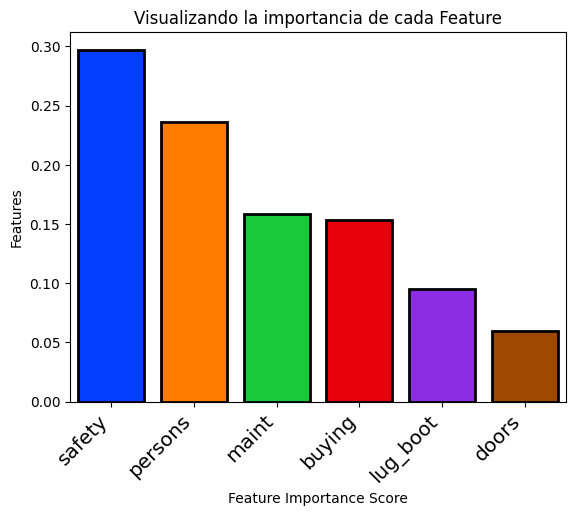

In [20]:
sns.barplot(x=feature_importances_df.feature,y=feature_importances_df.importance,palette = 'bright', saturation = 2.0, edgecolor ='black', linewidth = 2)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizando la importancia de cada Feature')
plt.xticks(rotation=45,horizontalalignment ="right",fontweight="light",fontsize="x-large")
plt.show()

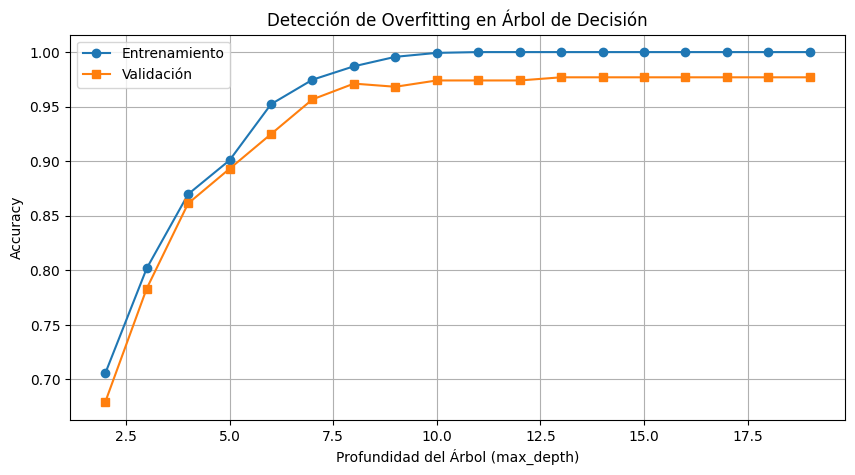

In [21]:
# Datos (usamos X, y de tu dataset)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_scores = []
val_scores = []
max_depths = range(2,20)  # Profundidades de 1 a 20

for max_depth in max_depths:
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Evaluamos en los conjuntos de entrenamiento y validación
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))

    train_scores.append(train_acc)
    val_scores.append(val_acc)

# Graficamos las curvas de accuracy
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label="Entrenamiento", marker='o')
plt.plot(max_depths, val_scores, label="Validación", marker='s')
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("Accuracy")
plt.title("Detección de Overfitting en Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()

# OPTIMIZAMOS EL MODELO

In [22]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.9 MB/s eta 0:00:00


In [23]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
# Definir los rangos de hiperparámetros
param_space = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2'])
}

# Instancia del modelo
rf = RandomForestClassifier(random_state=42)

# Optimización bayesiana
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space,
                             n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Entrenar con los datos
bayes_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores parámetros:", bayes_search.best_params_)
print("Mejor puntuación:", bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi